In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ChristianMunger/Fantasy-Footbal-Linear-Regression/main/data_cleaned.csv'
df = pd.read_csv(url)

df.head()

df = df.iloc[:, 1:]
# iloc is a row indexer and column indexer

# New Section

In [3]:
df.head()

,player_id,tm,pos,player,season,week,NFL_draft_year,NFL_draft_round,NFL_draft_rank,height_inches,weight_pounds,forty_yd,three_cone,bench,broad_jump,combine_height,shuttle,vertical,offensive_snapcount,offensive_snapcount_percentage,passing_int,passing_rating,passing_yds,passing_two_pt_md,passing_td,passing_att,receiving_yds,receiving_td,receiving_rec,receiving_tar,rushing_att,rushing_td,rushing_yds,fumbles_lost,half_ppr_fantasy_points,ppr_fantasy_points,standard_fantasy_points
0,2755,NYG,WR,Rueben Randle,2014,9,2012.0,2.0,63.0,74.0,208.0,4.55,6.99,15.0,121.0,75.0,4.36,31.0,72.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,4.0,11.0,0.0,0.0,0.0,0.0,6.9,8.9,4.9
1,2755,NYG,WR,Rueben Randle,2014,10,2012.0,2.0,63.0,74.0,208.0,4.55,6.99,15.0,121.0,75.0,4.36,31.0,66.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,5.0,10.0,0.0,0.0,0.0,0.0,6.4,8.9,3.9
2,2755,NYG,WR,Rueben Randle,2014,11,2012.0,2.0,63.0,74.0,208.0,4.55,6.99,15.0,121.0,75.0,4.36,31.0,55.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0.0,7.0,15.0,0.0,0.0,0.0,0.0,14.7,18.2,11.2
3,2755,NYG,WR,Rueben Randle,2014,12,2012.0,2.0,63.0,74.0,208.0,4.55,6.99,15.0,121.0,75.0,4.36,31.0,69.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,5.1,6.6,3.6
4,2755,NYG,WR,Rueben Randle,2014,13,2012.0,2.0,63.0,74.0,208.0,4.55,6.99,15.0,121.0,75.0,4.36,31.0,45.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,6.7,8.2,5.2


In [4]:
df.columns

Index(['player_id', 'tm', 'pos', 'player', 'season', 'week', 'NFL_draft_year',
       'NFL_draft_round', 'NFL_draft_rank', 'height_inches', 'weight_pounds',
       'forty_yd', 'three_cone', 'bench', 'broad_jump', 'combine_height',
       'shuttle', 'vertical', 'offensive_snapcount',
       'offensive_snapcount_percentage', 'passing_int', 'passing_rating',
       'passing_yds', 'passing_two_pt_md', 'passing_td', 'passing_att',
       'receiving_yds', 'receiving_td', 'receiving_rec', 'receiving_tar',
       'rushing_att', 'rushing_td', 'rushing_yds', 'fumbles_lost',
       'half_ppr_fantasy_points', 'ppr_fantasy_points',
       'standard_fantasy_points'],
      dtype='object')

In [5]:
df['season'].min(), df['season'].max()

(2000, 2019)

In [6]:
import numpy as np

df = df.groupby(['player_id', 'tm', 'player', 'pos', 'season'], as_index=False)\
    .agg({
      'offensive_snapcount': np.sum,
      'offensive_snapcount_percentage': np.mean,
      'passing_rating': np.mean,
      'passing_yds': np.sum,
      'passing_td': np.sum,
      'passing_att': np.sum,
      'receiving_yds': np.sum,
      'receiving_td': np.sum,
      'receiving_rec': np.sum,
      'receiving_tar': np.sum,
      'rushing_att': np.sum,
      'standard_fantasy_points': np.sum,
      'ppr_fantasy_points': np.sum,
      'half_ppr_fantasy_points': np.sum
})

In [7]:
df.head()

,player_id,tm,player,pos,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,passing_att,receiving_yds,receiving_td,receiving_rec,receiving_tar,rushing_att,standard_fantasy_points,ppr_fantasy_points,half_ppr_fantasy_points
0,2,CHI,Justin Gage,WR,2003,0.0,NaN,0.0,0.0,0.0,0.0,338.0,2.0,17.0,35.0,0.0,45.8,62.8,54.3
1,2,CHI,Justin Gage,WR,2004,0.0,NaN,0.0,0.0,0.0,0.0,156.0,0.0,12.0,28.0,0.0,15.6,27.6,21.6
2,2,CHI,Justin Gage,WR,2005,0.0,NaN,0.0,0.0,0.0,0.0,346.0,2.0,31.0,55.0,0.0,46.6,77.6,62.1
3,2,CHI,Justin Gage,WR,2006,0.0,NaN,0.0,0.0,0.0,0.0,68.0,0.0,4.0,8.0,0.0,6.8,10.8,8.8
4,2,OTI,Justin Gage,WR,2007,0.0,NaN,0.0,0.0,0.0,0.0,750.0,2.0,55.0,85.0,0.0,87.0,142.0,114.5


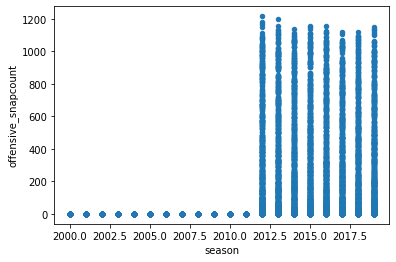

In [8]:
df.plot(x = 'season', y = 'offensive_snapcount', kind = 'scatter')
#no data before 2012

In [9]:
df = df.loc[df['season'] >= 2012]
df.shape

(4786, 19)

In [10]:
pd.set_option('chained_assignment', None)

lag_features = [
                'rushing_att',
                'receiving_tar',
                'offensive_snapcount',
                'offensive_snapcount_percentage',
                'ppr_fantasy_points',
                'passing_rating',
                'passing_att',
                'passing_td'
]

for lag in range(1,6):

  shifted = df.groupby('player_id').shift(lag)
  
  for column in lag_features:
    df[f'lag_{column}_{lag}'] = shifted[column]

df = df.fillna(-1)

In [11]:
df.head()

,player_id,tm,player,pos,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,passing_att,receiving_yds,receiving_td,receiving_rec,receiving_tar,rushing_att,standard_fantasy_points,ppr_fantasy_points,half_ppr_fantasy_points,lag_rushing_att_1,lag_receiving_tar_1,lag_offensive_snapcount_1,lag_offensive_snapcount_percentage_1,lag_ppr_fantasy_points_1,lag_passing_rating_1,lag_passing_att_1,lag_passing_td_1,lag_rushing_att_2,lag_receiving_tar_2,lag_offensive_snapcount_2,lag_offensive_snapcount_percentage_2,lag_ppr_fantasy_points_2,lag_passing_rating_2,lag_passing_att_2,lag_passing_td_2,lag_rushing_att_3,lag_receiving_tar_3,lag_offensive_snapcount_3,lag_offensive_snapcount_percentage_3,lag_ppr_fantasy_points_3,lag_passing_rating_3,lag_passing_att_3,lag_passing_td_3,lag_rushing_att_4,lag_receiving_tar_4,lag_offensive_snapcount_4,lag_offensive_snapcount_percentage_4,lag_ppr_fantasy_points_4,lag_passing_rating_4,lag_passing_att_4,lag_passing_td_4,lag_rushing_att_5,lag_receiving_tar_5,lag_offensive_snapcount_5,lag_offensive_snapcount_percentage_5,lag_ppr_fantasy_points_5,lag_passing_rating_5,lag_passing_att_5,lag_passing_td_5
18,8,HTX,Nate Washington,WR,2015,793.0,76.428571,0.0,0.0,0.0,0.0,658.0,4.0,47.0,94.0,0.0,89.8,136.8,113.3,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,8,OTI,Nate Washington,WR,2012,789.0,78.125000,0.0,0.0,0.0,0.0,746.0,4.0,46.0,89.0,0.0,98.6,144.6,121.6,0.0,94.0,793.0,76.428571,136.8,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
23,8,OTI,Nate Washington,WR,2013,887.0,82.500000,0.0,0.0,0.0,0.0,919.0,3.0,58.0,105.0,0.0,109.9,167.9,138.9,0.0,89.0,789.0,78.125000,144.6,0.0,0.0,0.0,0.0,94.0,793.0,76.428571,136.8,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
24,8,OTI,Nate Washington,WR,2014,767.0,78.437500,0.0,0.0,0.0,0.0,647.0,2.0,40.0,72.0,0.0,76.7,116.7,96.7,0.0,105.0,887.0,82.500000,167.9,0.0,0.0,0.0,0.0,89.0,789.0,78.125000,144.6,0.0,0.0,0.0,0.0,94.0,793.0,76.428571,136.8,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29,9,CRD,Chris Johnson,RB,2015,366.0,47.636364,0.0,0.0,0.0,0.0,58.0,0.0,6.0,13.0,196.0,105.2,111.2,108.2,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [12]:
df.corr()['ppr_fantasy_points']

#correlations between lag features and fantasy points

player_id                              -0.164576
season                                 -0.011656
offensive_snapcount                     0.892725
offensive_snapcount_percentage          0.780541
passing_rating                          0.313380
passing_yds                             0.467768
passing_td                              0.478292
passing_att                             0.458360
receiving_yds                           0.679074
receiving_td                            0.603843
receiving_rec                           0.705915
receiving_tar                           0.684079
rushing_att                             0.460929
standard_fantasy_points                 0.969913
ppr_fantasy_points                      1.000000
half_ppr_fantasy_points                 0.993836
lag_rushing_att_1                       0.274565
lag_receiving_tar_1                     0.418966
lag_offensive_snapcount_1               0.540950
lag_offensive_snapcount_percentage_1    0.510926
lag_ppr_fantasy_poin

In [13]:
df.loc[df['pos'] == 'WR'].corr()['ppr_fantasy_points']
#pprfantasypoints correlations for wr
#lagpprfantasypoints, offensive snapcounts and lagreivingtargets

player_id                              -0.216103
season                                 -0.049934
offensive_snapcount                     0.920471
offensive_snapcount_percentage          0.825539
passing_rating                          0.170908
passing_yds                             0.135889
passing_td                              0.145277
passing_att                             0.182629
receiving_yds                           0.989402
receiving_td                            0.899715
receiving_rec                           0.982602
receiving_tar                           0.975496
rushing_att                             0.151222
standard_fantasy_points                 0.995272
ppr_fantasy_points                      1.000000
half_ppr_fantasy_points                 0.999249
lag_rushing_att_1                       0.105702
lag_receiving_tar_1                     0.615157
lag_offensive_snapcount_1               0.574662
lag_offensive_snapcount_percentage_1    0.543646
lag_ppr_fantasy_poin

In [14]:
wr_df = df.loc[(df['pos'] == 'WR') & (df['season'] < 2019)]

wr_df.shape

(1570, 59)

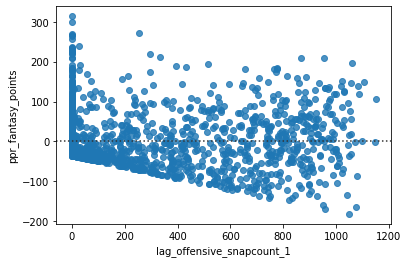

In [15]:
import seaborn as sns

sns.residplot(x=wr_df['lag_offensive_snapcount_1'], y=wr_df['ppr_fantasy_points'])
#set minimum threshold due to a lot of values around 0

In [16]:
wr_df = wr_df.loc[wr_df['lag_offensive_snapcount_1'] > 50]

wr_df.shape

(865, 59)

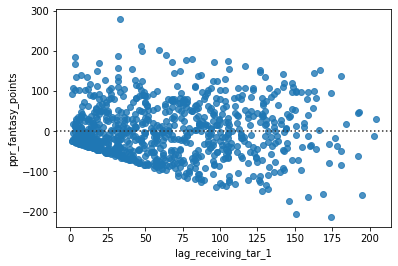

In [17]:
sns.residplot(x=wr_df['lag_receiving_tar_1'], y=wr_df['ppr_fantasy_points'])

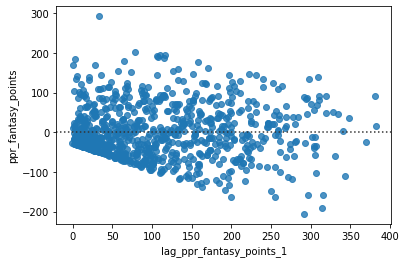

In [18]:
sns.residplot(x=wr_df['lag_ppr_fantasy_points_1'], y=wr_df['ppr_fantasy_points'])

In [19]:
X =  wr_df[[
    'lag_receiving_tar_1', 'lag_offensive_snapcount_1', 'lag_ppr_fantasy_points_1'
]].values

In [20]:
y = wr_df['ppr_fantasy_points'].values

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = lr.predict(X_test)

In [23]:
y_pred

array([ 99.55939815,  90.99683827,  51.39644753,  94.77335847,
        73.26347024,  76.50191936, 164.73378033, 126.41589415,
        39.49512488, 201.5458203 , 115.69632185,  59.05107146,
        38.58420581,  66.50629234, 106.59490674,  49.71847409,
       109.04692802,  36.31314463,  44.64476899, 206.55971793,
        81.21827818, 200.76663495, 136.52103379, 230.86197378,
       117.64684434, 145.77412193, 118.58327853,  34.26719682,
        33.83110891,  89.09114079, 164.75142766,  30.16059695,
       210.48437098,  42.94846587,  51.75992257, 180.12537542,
       151.02726908,  92.33239905,  34.64436179,  67.95052582,
        54.11749055,  36.95306029,  50.78348631,  74.12353817,
       113.39031498, 157.82349461, 232.35957789,  29.49460074,
       180.60681555,  45.19829253,  43.9606876 ,  65.89086458,
       141.79286369,  49.8395844 ,  43.12792265, 157.8619717 ,
        43.6658533 ,  33.72442015,  97.20639347,  39.12698248,
        38.07921977, 151.7698272 ,  56.28592443,  37.95

In [24]:
mean_absolute_error(y_test, y_pred)
#On average our model is off by about 47 fantasy points total or about 2.93 a game

47.723927320905254

In [25]:
pd.set_option('display.max_rows', None)

wr_df_pred = df.loc[
                    (df['pos'] == 'WR') & (df['offensive_snapcount'] > 50) & (df['season'] == 2019),
                    ['player', 'receiving_tar', 'offensive_snapcount', 'ppr_fantasy_points']                 
]

wr_df_pred['predicted_2020'] = lr.predict(
    wr_df_pred[['receiving_tar', 'offensive_snapcount', 'ppr_fantasy_points']].values
)

wr_df_pred.sort_values(by = 'predicted_2020', ascending=False).head(100)

#linear model predicitions for wide receivers for 2020

,player,receiving_tar,offensive_snapcount,ppr_fantasy_points,predicted_2020
7143,Michael Thomas,185.0,942.0,374.60,284.761170
4745,Julio Jones,157.0,812.0,274.10,216.701530
7597,Chris Godwin,120.0,937.0,276.10,215.175665
7520,Cooper Kupp,134.0,886.0,270.50,212.552721
5952,DeAndre Hopkins,150.0,971.0,268.54,212.008803
5997,Keenan Allen,149.0,931.0,261.50,207.410245
2892,Julian Edelman,153.0,1003.0,256.28,203.962208
6301,Allen Robinson,154.0,1003.0,254.90,203.112221
7489,Kenny Golladay,116.0,937.0,248.00,196.272113
6863,DeVante Parker,128.0,906.0,246.20,195.970438
